# Previsão de Diagnósticos de Doenças de Coração

# 1. Config


## 1.1 Descrição dos Dados

### Contextualização

As doenças cardiovasculares representam uma das principais causas de morte no mundo, sendo responsáveis por milhões de óbitos a cada ano, segundo a Organização Mundial da Saúde (OMS). Dentre essas doenças, a insuficiência cardíaca é uma condição clínica grave caracterizada pela incapacidade do coração de bombear sangue de forma eficiente para atender às necessidades do corpo.

A identificação precoce de pacientes com risco de desenvolver insuficiência cardíaca é fundamental para reduzir complicações, hospitalizações e mortalidade. Nesse contexto, técnicas de Aprendizado de Máquina (AM) têm sido amplamente exploradas como ferramentas promissoras para auxiliar no diagnóstico e na previsão de doenças cardíacas, fornecendo suporte à tomada de decisão médica.

Este trabalho utiliza o conjunto de dados **Heart Failure Prediction**, disponível no [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction), que reúne informações clínicas de pacientes, como idade, sexo, pressão arterial, colesterol, frequência cardíaca, entre outros fatores. A variável alvo indica se o paciente apresenta ou não doença cardíaca.

O objetivo do estudo é aplicar modelos de Aprendizado de Máquina supervisionados para prever a presença de doença cardíaca a partir dos dados disponíveis, avaliando o desempenho de diferentes algoritmos e analisando quais variáveis mais contribuem para a predição.


### Dicionário de Dados - Diagnóstico de Doença Cardíaca

- **Idade** (`Age`): idade do paciente [anos]
- **Sexo** (`Sex`): sexo do paciente  
  - `M`: Masculino  
  - `F`: Feminino  
- **TipoDorPeito** (`ChestPainType`): tipo de dor no peito  
  - `TA`: Angina Típica  
  - `ATA`: Angina Atípica  
  - `NAP`: Dor Não-Anginosa  
  - `ASY`: Assintomático  
- **PressaoRepouso** (`RestingBP`): pressão arterial em repouso [mm Hg]
- **Colesterol** (`Cholesterol`): nível de colesterol sérico [mg/dl]
- **GlicoseJejum** (`FastingBS`): glicemia em jejum  
  - `1`: se glicose em jejum > 120 mg/dl  
  - `0`: caso contrário  
- **ECGRepouso** (`RestingECG`): resultado do eletrocardiograma em repouso  
  - `Normal`: Normal  
  - `ST`: Anormalidade da onda ST-T (inversão da onda T e/ou elevação ou depressão do ST > 0.05 mV)  
  - `LVH`: Hipertrofia ventricular esquerda provável ou definitiva (critérios de Estes)  
- **FrequenciaMaxima** (`MaxHR`): frequência cardíaca máxima alcançada [valor numérico entre 60 e 202]
- **AnginaExercicio** (`ExerciseAngina`): angina induzida por exercício  
  - `Y`: Sim  
  - `N`: Não  
- **Oldpeak** (`Oldpeak`): depressão do segmento ST induzida por exercício em relação ao repouso [valor numérico]
- **InclinacaoST** (`ST_Slope`): inclinação do segmento ST no pico do exercício  
  - `Up`: Ascendente  
  - `Flat`: Plana  
  - `Down`: Descendente  
- **DoencaCardiaca** (`HeartDisease`): variável alvo  
  - `1`: presença de doença cardíaca  
  - `0`: normal (sem doença cardíaca)



## 1.2 Instalação e Importação de Bibliotecas

In [ ]:
# Instalação de Pacotes de Rede Neural

!pip install tensorflow keras
!pip install scikeras

In [ ]:
#Importação de Bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import KernelPCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


## Configurações Globais
plt.rcParams['figure.figsize'] = [10, 6]
sns.set_palette("dark")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.3 Load Data

In [ ]:
# Carregamento do csv para um DataFrame
df = pd.read_csv("/content/drive/MyDrive/AM/heart.csv")

In [ ]:
# 5 primeiras linhas
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 2. Pré-Processamento

### 2.1 Identificação de Variáveis

In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## 2.2 Tratamento de dados categóricos

In [ ]:
# Definição de features categóricas de acordo com o tipo: object

var_categorica = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
df[var_categorica].describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


Nota-se um número pequeno de valores únicos para as features, por meio da linha 'unique'

### Ordinal Encoder

In [ ]:
df["Sex"] = df["Sex"].replace({"M": 1, "F": 0})

<ipython-input-84-86587eecaab1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Sex"] = df["Sex"].replace({"M": 1, "F": 0})


#### `Sex` — Codificação Binária
A variável `Sex` indica o sexo do paciente, com os valores:

- `M`: Masculino  
- `F`: Feminino

Apesar de ser uma variável categórica, ela contém **apenas duas classes** e **não possui ordem natural**.

Aplicou-se **mapeamento binário**, convertendo para `0` (F) e `1` (M), o que é eficiente e evita a criação de colunas desnecessárias.

---

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### `ExerciseAngina` — Codificação Binária
A variável `ExerciseAngina` indica a presença de angina induzida por esforço:

- `Y`: Sim  
- `N`: Não

Trata-se de uma variável **binária nominal**, sem ordem natural entre os valores, mas com significado clínico claro.

Foi aplicada **codificação binária**, mapeando `N` para `0` e `Y` para `1`, o que é apropriado e eficiente para modelos supervisionados.

---

In [ ]:
df["ExerciseAngina"] = df["ExerciseAngina"].replace({"N": 0, "Y": 1})

<ipython-input-86-de14730c2840>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ExerciseAngina"] = df["ExerciseAngina"].replace({"N": 0, "Y": 1})


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,0,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,1,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,0,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,1,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,0,0


#### `ST_Slope` — Ordinal Encoding
A variável `ST_Slope` representa a inclinação do segmento ST no eletrocardiograma de esforço:

- `Up`: Ascendente (normal)  
- `Flat`: Plana (intermediário)  
- `Down`: Descendente (pior caso)

Neste caso, há uma **ordem clínica significativa** entre as categorias: `Up < Flat < Down` em termos de gravidade.

Por isso, foi utilizado **Ordinal Encoding**, preservando essa hierarquia para que os modelos possam capturar essa relação de risco.

---

In [ ]:
df["ST_Slope"] = pd.Categorical(df["ST_Slope"], categories=["Up", "Flat", "Down"], ordered=True).codes

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,0,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,1,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,0,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,1,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,0,0


#### `ChestPainType` - Ordinal Encoding

A variável `ChestPainType` representa o tipo de dor no peito relatado pelo paciente, com as seguintes categorias:

- `ASY`: Assintomático  
- `NAP`: Dor Não-Anginosa  
- `ATA`: Angina Atípica  
- `TA`: Angina Típica

Embora originalmente seja uma variável **categórica nominal**, é possível atribuir uma **ordem clínica interpretável** a essas categorias com base na gravidade dos sintomas e na probabilidade de estarem associadas a uma doença cardíaca:

- `ASY` (0): geralmente indica maior risco, pois o paciente não sente dor apesar de possíveis anormalidades cardíacas;  
- `NAP` (1): dor torácica que não se encaixa no padrão típico de angina;  
- `ATA` (2): dor com algumas características de angina;  
- `TA` (3): angina típica, mais comum em quadros de cardiopatia isquêmica.

Com essa lógica, aplicou-se **Ordinal Encoding**, substituindo as categorias por valores inteiros crescentes (`ASY = 0` até `TA = 3`), permitindo que modelos de aprendizado de máquina aproveitem essa **ordem implícita baseada em risco clínico**.

In [ ]:
df['ChestPainType'] = df['ChestPainType'].replace({"ASY": 0, "NAP": 1, "ATA": 2, "TA": 3})

<ipython-input-90-5bbe26fa0fc6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ChestPainType'] = df['ChestPainType'].replace({"ASY": 0, "NAP": 1, "ATA": 2, "TA": 3})


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,Normal,172,0,0.0,0,0
1,49,0,1,160,180,0,Normal,156,0,1.0,1,1
2,37,1,2,130,283,0,ST,98,0,0.0,0,0
3,48,0,0,138,214,0,Normal,108,1,1.5,1,1
4,54,1,1,150,195,0,Normal,122,0,0.0,0,0


### OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(df[['RestingECG']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['RestingECG']))
df = pd.concat([df, encoded_df], axis=1)
df.drop('RestingECG', axis=1, inplace=True)

#### `RestingECG` — One-Hot Encoding
A variável `RestingECG` representa o resultado do eletrocardiograma em repouso, com os seguintes valores:

- `Normal`  
- `ST`: Anormalidade da onda ST-T  
- `LVH`: Hipertrofia ventricular esquerda

Embora os valores representem condições clínicas distintas, **não existe uma ordem definida ou progressiva entre eles**.

Portanto, utilizou-se **One-Hot Encoding**, para codificar cada classe sem atribuir significado ordinal.

---

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,40,1,2,140,289,0,172,0,0.0,0,0,0.0,1.0,0.0
1,49,0,1,160,180,0,156,0,1.0,1,1,0.0,1.0,0.0
2,37,1,2,130,283,0,98,0,0.0,0,0,0.0,0.0,1.0
3,48,0,0,138,214,0,108,1,1.5,1,1,0.0,1.0,0.0
4,54,1,1,150,195,0,122,0,0.0,0,0,0.0,1.0,0.0


### Separação de variáveis e padronização com `StandardScaler`




In [ ]:
# Separar X e y
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

var_categorica = ['Sex', 'ChestPainType', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina', 'ST_Slope']

numerical_features = X.drop(var_categorica, axis=1).columns.tolist()

# StandardScaler para numéricas
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

#### Separação entre variáveis independentes (X) e alvo (y)
No início do processo de modelagem, é essencial separar as variáveis explicativas (`X`) da variável alvo (`y`). Neste caso:

- `X` contém todas as variáveis preditoras, ou seja, os atributos clínicos dos pacientes;
- `y` representa a variável alvo `HeartDisease`, que indica a presença (`1`) ou ausência (`0`) de doença cardíaca.

Essa separação é fundamental para treinar modelos supervisionados de aprendizado de máquina.

---

#### Identificação de variáveis categóricas
Foi definida a lista `var_categorica` contendo variáveis categóricas já tratadas anteriormente via codificação (`Sex`, `ChestPainType`, dummies de `RestingECG`, `ExerciseAngina` e `ST_Slope`). Isso permite isolar corretamente as variáveis **numéricas contínuas** para o próximo passo.

---

#### Aplicação do `StandardScaler` para variáveis numéricas
As variáveis numéricas contínuas foram padronizadas usando o `StandardScaler`, que transforma os dados para que tenham média 0 e desvio padrão 1.

**Justificativa**: muitos algoritmos de aprendizado de máquina (como regressão logística, SVM e KNN) são sensíveis à escala das variáveis. Padronizar os dados garante que todas as variáveis numéricas contribuam igualmente para o modelo e evita que atributos com escalas maiores dominem o aprendizado.

Esse pré-processamento melhora a performance e a estabilidade dos modelos, especialmente quando há variáveis com magnitudes diferentes como pressão arterial, colesterol, frequência cardíaca, etc.

---

In [ ]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,RestingECG_LVH,RestingECG_Normal,RestingECG_ST
0,-1.433140,1,2,0.410909,0.825070,-0.551341,1.382928,0,-0.832432,0,0.0,1.0,0.0
1,-0.478484,0,1,1.491752,-0.171961,-0.551341,0.754157,0,0.105664,1,0.0,1.0,0.0
2,-1.751359,1,2,-0.129513,0.770188,-0.551341,-1.525138,0,-0.832432,0,0.0,0.0,1.0
3,-0.584556,0,0,0.302825,0.139040,-0.551341,-1.132156,1,0.574711,1,0.0,1.0,0.0
4,0.051881,1,1,0.951331,-0.034755,-0.551341,-0.581981,0,-0.832432,0,0.0,1.0,0.0


# 3. Visualização dos Dados

### 3.1 PCA

In [ ]:
from sklearn.decomposition import PCA

#Cria uma instância da classe PCA
PCAinst = PCA(n_components=2, whiten=True)

#Ajusta a instância aos dados e o transforma
trans = PCAinst.fit_transform(df)

#Configura o dataframe resultante
data_trans = pd.DataFrame(data=trans)
data_trans.columns = ['PC1','PC2']
data_trans['HeartDisease'] =  df['HeartDisease']

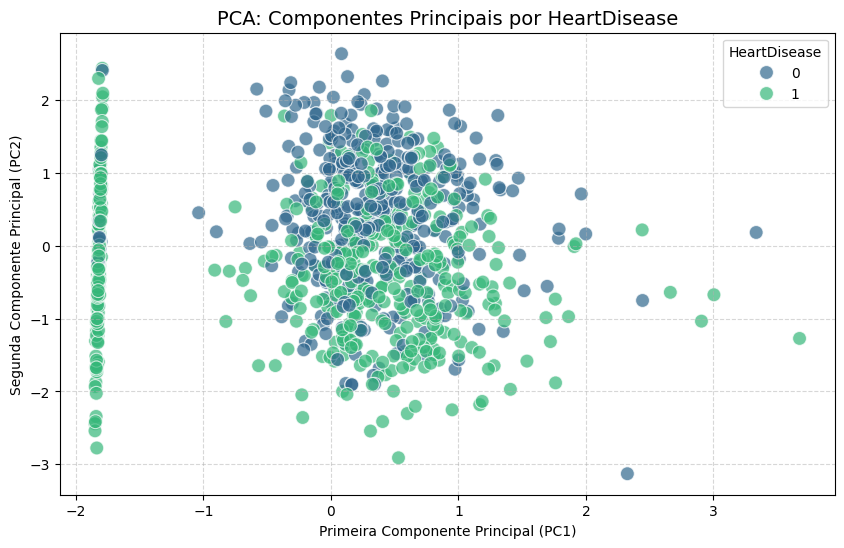

In [ ]:
# Criar o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data_trans,
    x='PC1',
    y='PC2',
    hue='HeartDisease',  # Cor por categoria de HeartDisease
    palette='viridis',   # Esquema de cores (opcional)
    alpha=0.7,          # Transparência dos pontos
    s=100               # Tamanho dos pontos
)

# Adicionar rótulos e título
plt.title('PCA: Componentes Principais por HeartDisease', fontsize=14)
plt.xlabel('Primeira Componente Principal (PC1)')
plt.ylabel('Segunda Componente Principal (PC2)')
plt.legend(title='HeartDisease', loc='best')

# Mostrar o gráfico
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### Análise do PCA: Componentes Principais por Presença de Doença Cardíaca

A figura acima mostra a projeção dos dados nas duas primeiras componentes principais obtidas pelo **PCA (Principal Component Analysis)**:

Nesta visualização, cada ponto representa uma amostra do conjunto de dados, colorida de acordo com a presença (`1`) ou ausência (`0`) de doença cardíaca.

Observações:

- Podemos perceber uma **grande sobreposição** entre as duas classes nas componentes principais.
- Embora haja uma leve tendência de separação ao longo da PC1, ela **não é suficiente** para uma boa discriminação entre os grupos.
- A distribuição aparentemente **não linear** dos dados sugere que o PCA linear pode não capturar toda a estrutura subjacente.

#### Próximo Passo: Kernel PCA

Devido à sobreposição significativa entre as classes no PCA linear, decidimos aplicar o **Kernel PCA**, uma técnica não linear que utiliza funções de kernel (como o RBF) para mapear os dados em um espaço de maior dimensionalidade. Esse mapeamento pode possibilitar uma **melhor separação entre as classes**, revelando estruturas mais complexas nos dados que o PCA linear não conseguiu capturar.


### 3.2 - KPCA

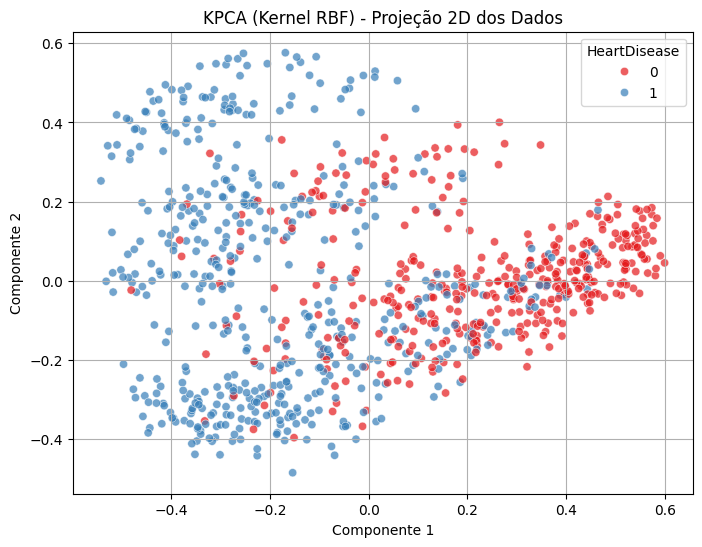

In [ ]:
# Aplicar KernelPCA
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.05)
X_kpca = kpca.fit_transform(X)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_kpca[:, 0], y=X_kpca[:, 1], hue=y, palette="Set1", alpha=0.7)
plt.title("KPCA (Kernel RBF) - Projeção 2D dos Dados")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend(title="HeartDisease")
plt.grid(True)
plt.show()


#### Análise de Componentes Principais com Kernel (KPCA)

A projeção abaixo foi obtida utilizando **Kernel PCA (KPCA)** com **função kernel RBF (Radial Basis Function)**, com o objetivo de reduzir a dimensionalidade do dataset de doenças cardíacas (`HeartDisease`) para **2 dimensões**. Essa técnica é especialmente útil quando os dados apresentam relações não lineares, o que dificulta a separação entre classes em espaços lineares.

---

##### Interpretação do Gráfico

- **Eixos**: Representam os dois componentes principais não lineares extraídos via KPCA.
- **Cores**:
  - **Vermelho (0)**: Pacientes **sem** doença cardíaca.
  - **Azul (1)**: Pacientes **com** doença cardíaca.

---

##### Observações

- **Separabilidade das classes**:
  - Observa-se uma **tendência de separação** entre os dois grupos, especialmente ao longo do eixo da **Componente 1**.
  - Pacientes com doença cardíaca (classe 1, azul) tendem a se agrupar mais à esquerda e à parte superior do gráfico.
  - Pacientes sem a doença (classe 0, vermelho) tendem a se concentrar na região central-direita inferior do gráfico.

- **Sobreposição**:
  - Existe uma **área de sobreposição** entre as classes no centro do gráfico, o que pode indicar a presença de pacientes com características mistas ou limítrofes.

---

##### Conclusão

A análise via KPCA mostra que os dados possuem **estrutura não linear**. Mesmo com alguma sobreposição, a projeção em 2D revela **padrões visuais relevantes** que podem auxiliar no entendimento dos dados e no desenvolvimento de modelos preditivos mais eficazes.


### 3.3 - Idade por presença de doença

Text(0.5, 1.0, 'Distribuição da Idade por Doença Cardíaca')

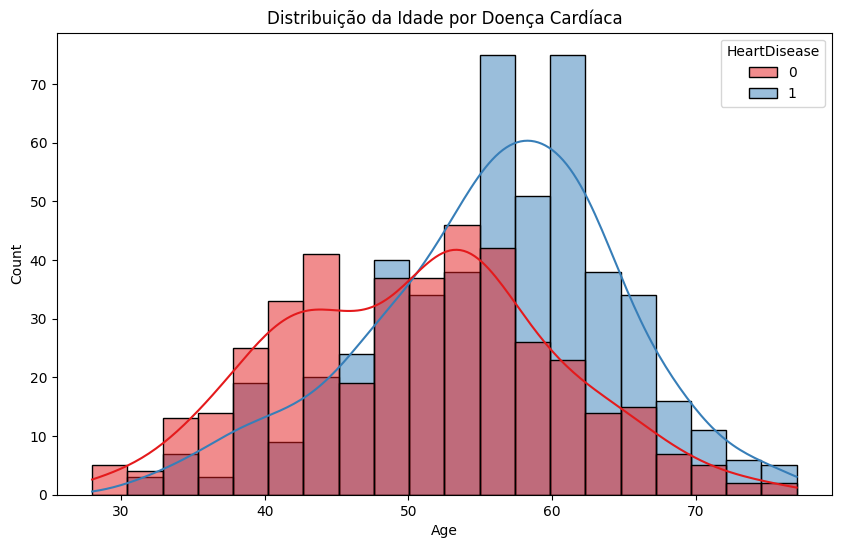

In [ ]:
sns.histplot(data=df, x="Age", hue="HeartDisease", bins=20, kde=True, palette="Set1")
plt.title("Distribuição da Idade por Doença Cardíaca")

Percebe-se que existe uma correlação forte entre a idade do paciente e a presença de doença no coração

### 3.4 - Boxplot de numéricas por presença de doença

Text(0.5, 1.0, 'Boxplots de Variáveis Numéricas por Doença Cardíaca')

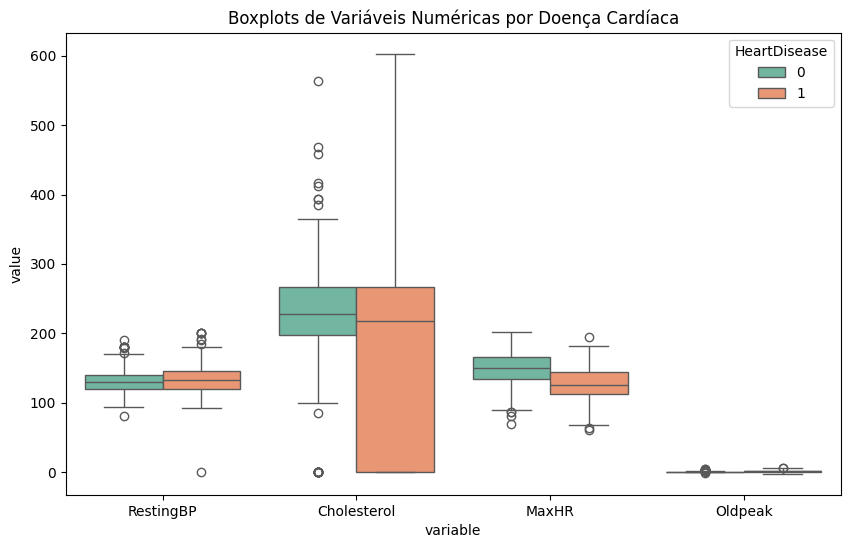

In [ ]:
num_vars = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_melt = df.melt(id_vars="HeartDisease", value_vars=num_vars)
sns.boxplot(data=df_melt, x="variable", y="value", hue="HeartDisease", palette="Set2")
plt.title("Boxplots de Variáveis Numéricas por Doença Cardíaca")

#### 1. RestingBP (Pressão Arterial em Repouso)
- **Distribuição:**  
  - Os dois grupos (com e sem doença cardíaca) apresentam medianas de RestingBP próximas, em torno de 120-130 mmHg.
  - A dispersão é semelhante nos dois casos, com presença de outliers em ambos.
- **Insight:**  
  - Essa variável sozinha não parece ser suficiente para discriminar a presença de doença cardíaca, já que as distribuições são bastante similares.

---

### 2. Cholesterol (Colesterol)
- **Distribuição:**  
  - O grupo **sem** doença cardíaca tende a ter valores de colesterol ligeiramente mais altos, com mediana acima de 240 mg/dL.
  - O grupo **com** doença cardíaca apresenta mediana mais abaixo, porém com maior dispersão de dados
  - Muitos outliers para **sem** doença cardíaca
- **Insight:**  
  - Percebe-se um limite superior bem maior para os **com** doença cardíaca, indicando que, para estes pacientes, é "normal" valores maiores de colesterol

---

### 3. MaxHR (Frequência Cardíaca Máxima)
- **Distribuição:**  
  - Pacientes **sem** doença cardíaca atingem frequências cardíacas máximas mais elevadas (mediana ~150-160 bpm).
  - Pacientes **com** doença cardíaca apresentam uma mediana menor, em torno de 120 bpm.
- **Insight:**  
  - Essa variável indica boa capacidade de distinguir os grupos, sugerindo que pessoas sem doença cardíaca suportam atividades físicas de maior intensidade.

---

### 4. Oldpeak (Depressão do Segmento ST)
- **Distribuição:**  
  - Escala ruim para análise

---

### 3.5 - Boxplot de OldPeak

Text(0.5, 1.0, 'Boxplots de Variáveis Numéricas por Doença Cardíaca')

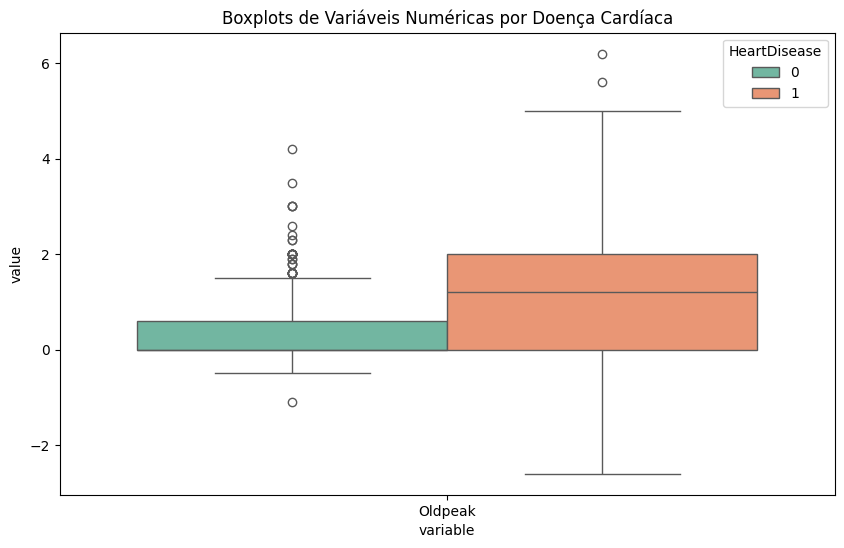

In [ ]:
num_vars = ['Oldpeak']
df_melt = df.melt(id_vars="HeartDisease", value_vars=num_vars)
sns.boxplot(data=df_melt, x="variable", y="value", hue="HeartDisease", palette="Set2")
plt.title("Boxplots de Variáveis Numéricas por Doença Cardíaca")


#### Distribuição dos Grupos:
- **HeartDisease = 0 (Sem Doença Cardíaca):**
  - A mediana é baixa, próxima de 0, indicando que a maioria dos pacientes sem doença cardíaca apresenta pouca ou nenhuma alteração no segmento ST.
  - A dispersão dos valores é menor, evidenciada por uma caixa pequena.
  - Existem poucos outliers abaixo de 0 e alguns casos acima de 2, mas eles são menos frequentes.

- **HeartDisease = 1 (Com Doença Cardíaca):**
  - A mediana está mais alta, próxima de 1, indicando que pacientes com doença cardíaca têm maior alteração de segmento ST no ECG.
  - A dispersão é maior, com a caixa abrangendo uma variação entre 0 e 2.
  - Também há vários outliers acima de 4, o que pode corresponder a pacientes com alterações muito severas.

---

### Comparação Geral:
- O **grupo com Doença Cardíaca (HeartDisease = 1)** apresenta valores de **Oldpeak** significativamente mais altos em comparação ao grupo sem doença.
- Existe uma clara separação entre os grupos, sugerindo que **Oldpeak pode ser uma variável relevante** para predizer a presença de doença cardíaca.
- A prevalência de outliers no grupo com doença cardíaca indica que há uma maior variabilidade de condições dentro desse grupo.

---

### Insight Importante:
Esse comportamento reforça a interpretação clínica de que alterações do segmento ST representam possíveis indícios de problemas no coração

---

### 3.6 - Heatmap de correlação entre variáveis numéricas

Text(0.5, 1.0, 'Mapa de Correlação')

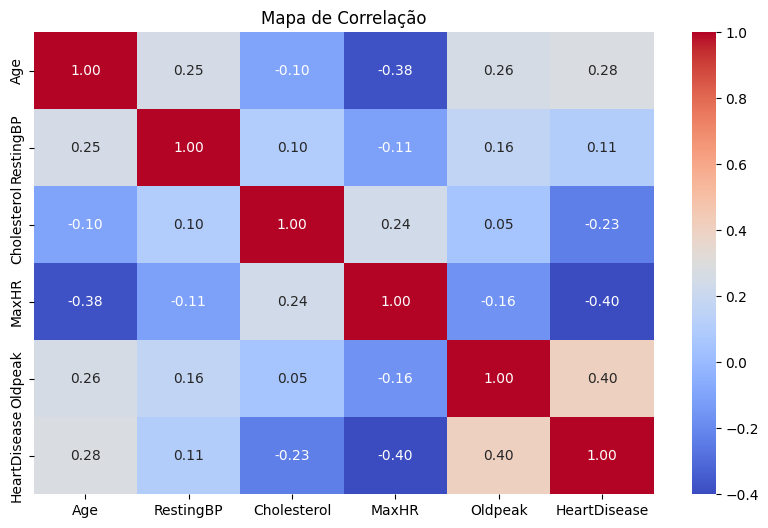

In [ ]:
corr = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação")

#### 1. **HeartDisease (Variável-Alvo)**
- **Correlação positiva:**
  - **Oldpeak (0.40):**
    - Há uma correlação moderada e positiva entre a variável **Oldpeak** (depressão do segmento ST) e a presença de doença cardíaca, indicando que maiores valores de **Oldpeak** estão associados à maior probabilidade de doença.
  - **Age (0.28):**
    - Existe uma correlação leve e positiva entre a **idade** e a presença de doença cardíaca, o que faz sentido clinicamente, já que a idade é um fator de risco conhecido.
- **Correlação negativa:**
  - **MaxHR (-0.40):**
    - A variável **frequência cardíaca máxima (MaxHR)** apresenta correlação moderada e negativa com a presença de doença cardíaca. Isso sugere que pessoas saudáveis tendem a alcançar frequências cardíacas máximas maiores durante exercícios.
  - **Cholesterol (-0.23):**
    - Correlação fraca negativa. Neste dataset, valores mais altos de colesterol estão modestamente associados à **ausência** de doença cardíaca, o que pode ser uma característica específica da amostra.
  - **RestingBP (-0.11):**
    - Correlação muito fraca negativa. Quase não há relação entre pressão arterial em repouso e presença de doença cardíaca.  
---

### Conclusões Principais
1. **Variáveis Mais Relevantes:**  
   - **Oldpeak** e **MaxHR** possuem as maiores magnitudes de correlação com a variável-alvo, sendo indicativos úteis para modelos preditivos de Doença Cardíaca.
   - **Age** apresenta uma correlação moderada, sendo um potencial fator a ser considerado junto às variáveis principais.

2. **Variáveis Menos Relevantes:**  
   - **Cholesterol** e **RestingBP** mostram correlações muito fracas com **HeartDisease**, indicando que podem ter menos peso isolado na predição.

3. **Interpretação Geral:**  
   - A matriz oferece informações importantes para a construção de modelos de aprendizado de máquina, especialmente para identificar o peso relativo das variáveis.
   - A alta correlação entre **Oldpeak** e **HeartDisease** destaca essa variável como um fator-chave na análise clínica e preditiva.


### 3.7 - Contagem de tipos de dor no peito por presença de doença

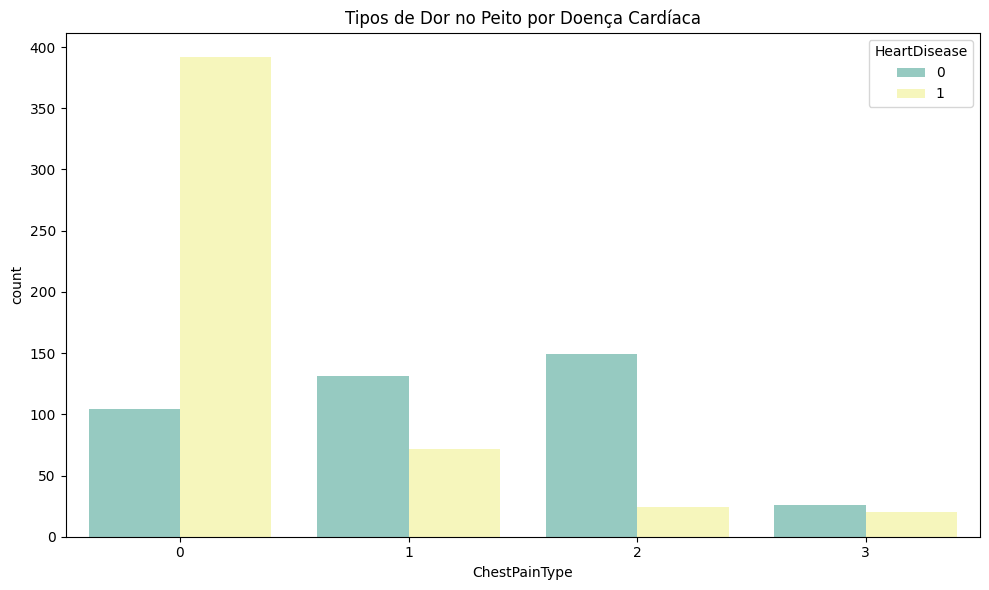

In [ ]:
sns.countplot(data=df, x="ChestPainType", hue="HeartDisease", palette="Set3")
plt.title("Tipos de Dor no Peito por Doença Cardíaca")

plt.tight_layout()
plt.show()

---

#### Tipos de Dor no Peito (ChestPainType):

1. **Tipo 0 (Asymptomatic - Assintomático):**
   - **HeartDisease = 1 (Doença Cardíaca):**
     - A maioria esmagadora dos casos de pacientes com doença cardíaca pertence ao **tipo 0** (assintomático), com mais de **400 ocorrências**.
   - **HeartDisease = 0 (Sem Doença Cardíaca):**
     - Relativamente menor frequência, cerca de **100 casos**.
   - **Insight:**  
     - Este tipo de dor no peito é altamente associado à presença de doenças cardíacas, indicando um padrão clínico em que a dor grave nem sempre está presente entre pacientes cardiopatas.

2. **Tipo 1 (Atypical Angina - Angina Atípica):**
   - **HeartDisease = 1:**  
     - Pouca frequência, com menos de **50 ocorrências**.
   - **HeartDisease = 0:**  
     - **Maior prevalência** em comparação aos casos com doença cardíaca, com mais de **200 ocorrências**.
   - **Insight:**  
     - A angina atípica parece estar associada mais com pacientes **sem doença cardíaca**, talvez por sua manifestação menos severa.

3. **Tipo 2 (Non-Anginal Pain - Dor Não Anginosa):**
   - **HeartDisease = 1:**  
     - Pouquíssimos casos são reportados, com menos de **25 registros**.
   - **HeartDisease = 0:**  
     - Representa um grupo expressivo, com cerca de **300 ocorrências**.
   - **Insight:**  
     - Dor não anginosa é amplamente mais comum em indivíduos **sem doença**, podendo representar condições menos graves ou outras causas não relacionadas à cardiopatia.

4. **Tipo 3 (Typical Angina - Angina Típica):**
   - **HeartDisease = 1:**  
     - Frequência **muito baixa**, com poucos indivíduos diagnosticados.
   - **HeartDisease = 0:**  
     - Frequência semelhante ao grupo com doença cardíaca.
   - **Insight:**  
     - A angina típica, apesar de ser classicamente associada a doenças do coração, **não é predominante** neste dataset.

---

### Conclusões
1. **Padrões Relevantes:**
   - O **tipo 0 (assintomático)** domina entre os pacientes com **doença cardíaca**, sugerindo que manifestações silenciosas são mais frequentes em cardiopatas.
   - Os **tipos 1 e 2** (angina atípica e dor não anginosa) estão mais relacionados aos pacientes **sem doença cardíaca**.
   - O **tipo 3 (angina típica)** apresenta frequência muito baixa em ambos os grupos, o que pode indicar menor representatividade no dataset.

2. **Implicações Clínicas:**
   - Dor no peito de tipo **assintomático** deve ser monitorada como um potencial indicador silencioso de **doença cardíaca**, chamando atenção para exames preventivos em pacientes que não apresentam dores típicas.

3. **Relevância para Modelos de Machine Learning:**
   - A variável **ChestPainType** possui bom potencial preditivo para discriminar **pacientes com e sem doença cardíaca**, especialmente pelo comportamento marcante no **tipo 0 (assintomático)**.

---

# 4. Modelo

## 4.1 DecisionTree

In [ ]:
# Definir o modelo
model = DecisionTreeClassifier(random_state=42)


# Obter previsões para cada instância (usando todos os folds)
predictions = cross_val_predict(model, X, y, cv=10)

# predictions contém as previsões finais para todo o dataset
accuracy_DecisionTree = accuracy_score(predictions, y)
precision_DecisionTree = precision_score(predictions, y)
recall_DecisionTree = recall_score(predictions, y)
fbeta_DecisionTree = fbeta_score(predictions, y, beta=1)

print(f"Acurácia: {accuracy_DecisionTree:.2f}")
print(f"Precisão: {precision_DecisionTree:.2f}")
print(f"Recall: {recall_DecisionTree:.2f}")
print(f"F-beta Score (beta=1): {fbeta_DecisionTree:.2f}")

Acurácia: 0.79
Precisão: 0.79
Recall: 0.82
F-beta Score (beta=1): 0.80


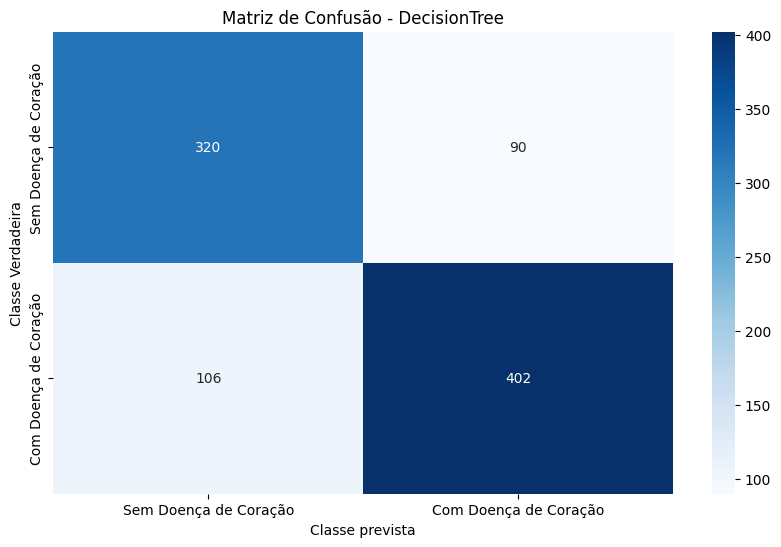

In [ ]:
cm = confusion_matrix(y, predictions)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Sem Doença de Coração', 'Com Doença de Coração'],
            yticklabels=['Sem Doença de Coração', 'Com Doença de Coração'])
plt.title("Matriz de Confusão - DecisionTree")
plt.xlabel("Classe prevista")
plt.ylabel("Classe Verdadeira")
plt.show()

## 4.2 Neural Network

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100,),
                     max_iter=1000,
                     early_stopping=True,
                     n_iter_no_change=40,
                     validation_fraction=0.1,
                     random_state=42)
predictions = cross_val_predict(model, X, y, cv=10)

accuracy_NeuralNet = accuracy_score(predictions, y)
recall_NeuralNet = recall_score(predictions, y)
precision_NeuralNet = precision_score(predictions, y)
fbeta_NeuralNet = fbeta_score(predictions, y, beta=1)

print(f"Acurácia da Rede Neural: {accuracy_NeuralNet:.2f}")
print(f"Recall da Rede Neural: {recall_NeuralNet:.2f}")
print(f"Precisão da Rede Neural: {precision_NeuralNet:.2f}")
print(f"F-beta Score da Rede Neural (beta=1): {fbeta_NeuralNet:.2f}")

Acurácia da Rede Neural: 0.83
Recall da Rede Neural: 0.84
Precisão da Rede Neural: 0.85
F-beta Score da Rede Neural (beta=1): 0.85


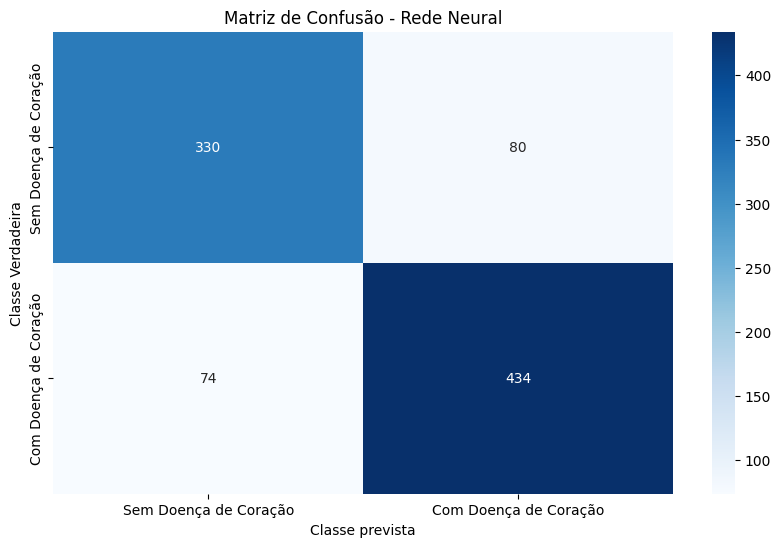

In [ ]:
cm = confusion_matrix(y, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Sem Doença de Coração', 'Com Doença de Coração'],
            yticklabels=['Sem Doença de Coração', 'Com Doença de Coração'])
plt.title("Matriz de Confusão - Rede Neural")
plt.xlabel("Classe prevista")
plt.ylabel("Classe Verdadeira")
plt.show()

## 4.3 KNN

In [ ]:
param_grid = {'n_neighbors': list(range(1, 21))}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X, y)

print("Melhor k encontrado:", grid.best_params_['n_neighbors'])

best_knn = grid.best_estimator_

Melhor k encontrado: 11


In [ ]:
predictions = cross_val_predict(best_knn, X, y, cv=10)

accuracy_KNN = accuracy_score(predictions, y)
recall_KNN = recall_score(predictions, y)
precision_KNN = precision_score(predictions, y)
fbeta_KNN = fbeta_score(predictions, y, beta=1)

print(f"Acurácia: {accuracy_KNN:.2f}")
print(f"Recall: {recall_KNN:.2f}")
print(f"Precisão: {precision_KNN:.2f}")
print(f"F-beta Score (beta=1): {fbeta_KNN:.2f}")

Acurácia: 0.84
Recall: 0.87
Precisão: 0.84
F-beta Score (beta=1): 0.86


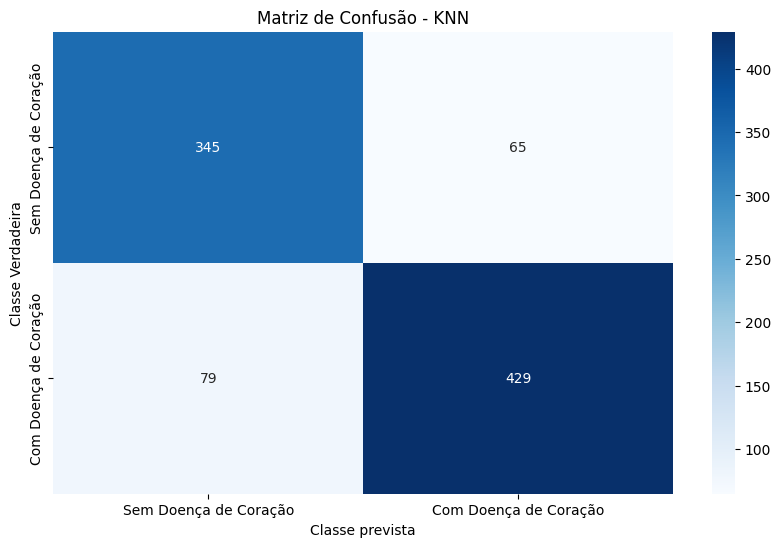

In [ ]:
cm = confusion_matrix(y, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Sem Doença de Coração', 'Com Doença de Coração'],
            yticklabels=['Sem Doença de Coração', 'Com Doença de Coração'])
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Classe prevista")
plt.ylabel("Classe Verdadeira")
plt.show()

## 4.4 Naive Bayes

In [ ]:
model = GaussianNB()

predictions = cross_val_predict(model, X, y, cv=10)

accuracy_NaiveBayes = accuracy_score(predictions, y)
recall_NaiveBayes = recall_score(predictions, y)
precision_NaiveBayes = precision_score(predictions, y)
fbeta_NaiveBayes = fbeta_score(predictions, y, beta=1)

print(f"Acurácia: {accuracy_NaiveBayes:.2f}")
print(f"Recall: {recall_NaiveBayes:.2f}")
print(f"Precisão: {precision_NaiveBayes:.2f}")
print(f"F-beta Score (beta=1): {fbeta_NaiveBayes:.2f}")

Acurácia: 0.84
Recall: 0.86
Precisão: 0.85
F-beta Score (beta=1): 0.85


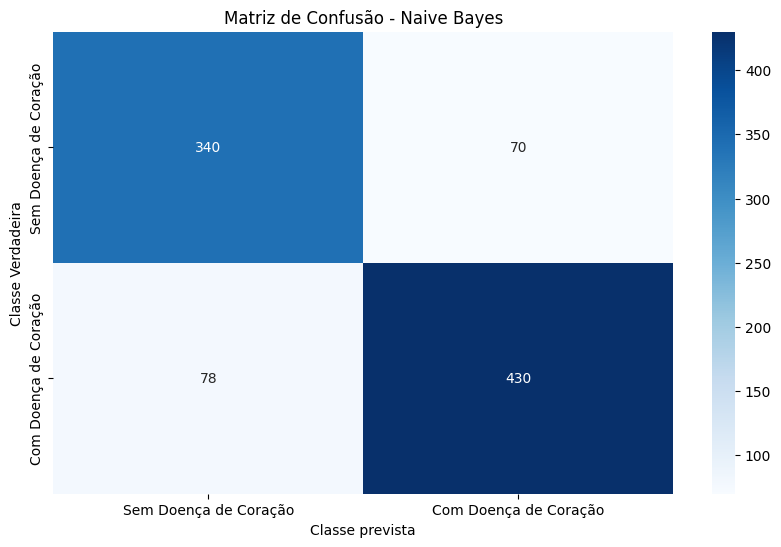

In [ ]:
cm = confusion_matrix(y, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Sem Doença de Coração', 'Com Doença de Coração'],
            yticklabels=['Sem Doença de Coração', 'Com Doença de Coração'])
plt.title("Matriz de Confusão - Naive Bayes")
plt.xlabel("Classe prevista")
plt.ylabel("Classe Verdadeira")
plt.show()

# 5. Comparação de Modelos

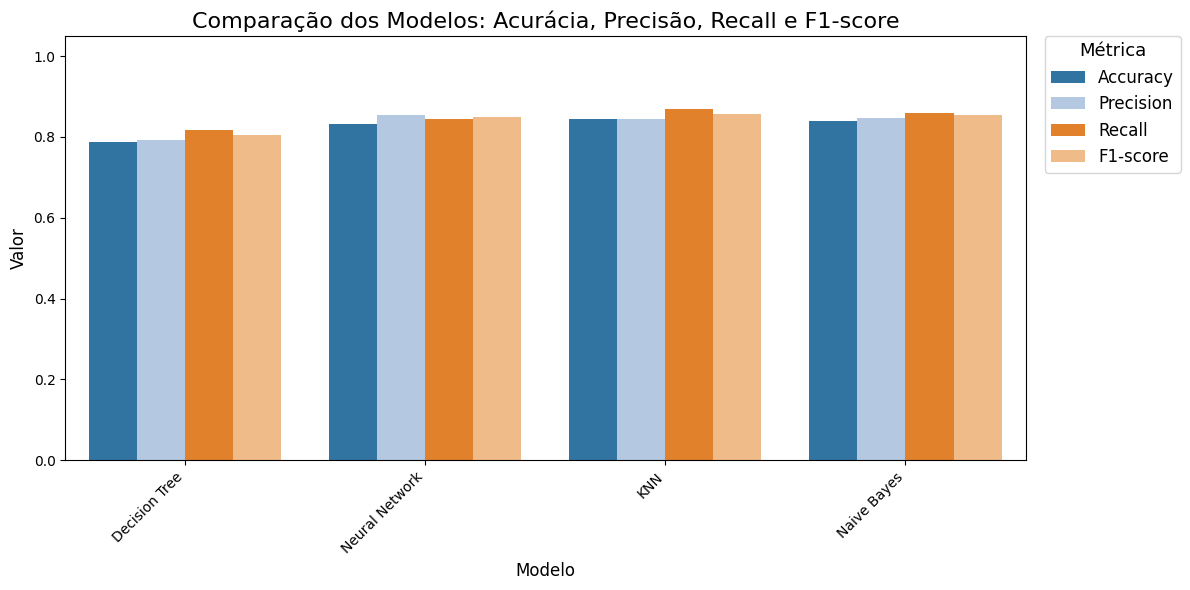

In [ ]:
#Criação de Dicionário para mapeamento das métricas
model_metrics = {
    'Decision Tree': {
        'Accuracy': accuracy_DecisionTree,
        'Precision': precision_DecisionTree,
        'Recall': recall_DecisionTree,
        'F1-score': fbeta_DecisionTree
    },
    'Neural Network': {
        'Accuracy': accuracy_NeuralNet,
        'Precision': precision_NeuralNet,
        'Recall': recall_NeuralNet,
        'F1-score': fbeta_NeuralNet
    },
    'KNN': {
        'Accuracy': accuracy_KNN,
        'Precision': precision_KNN,
        'Recall': recall_KNN,
        'F1-score': fbeta_KNN
    },
    'Naive Bayes': {
        'Accuracy': accuracy_NaiveBayes,
        'Precision': precision_NaiveBayes,
        'Recall': recall_NaiveBayes,
        'F1-score': fbeta_NaiveBayes
    },
}


# Convertendo para DataFrame
metrics_df = pd.DataFrame(model_metrics).T.reset_index()
metrics_df = metrics_df.rename(columns={'index': 'Model'})
metrics_df_melted = pd.melt(metrics_df, id_vars='Model', var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(12, 6))
sns.set_palette("tab20")
sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_df_melted)

plt.title('Comparação dos Modelos: Acurácia, Precisão, Recall e F1-score', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Modelo', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.ylim(0, 1.05)

plt.legend(title='Métrica', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()

## 5.1 - Análise do Gráfico: Comparação de Modelos – Acurácia, Precisão, Recall e F1-score

O gráfico de barras apresenta a comparação de quatro modelos de classificação (**Decision Tree**, **Neural Network**, **KNN** e **Naive Bayes**), avaliados por quatro métricas: **Acurácia**, **Precisão**, **Recall** e **F1-score**.

---

### 5.2 - Observações Gerais
1. **Alto Desempenho Geral**:
   - Todos os modelos apresentam métricas acima de **0.8**, indicando bom desempenho em termos de previsão.

2. **Performance Similar**:
   - As quatro métricas (Acurácia, Precisão, Recall e F1-score) mostraram valores muito próximos dentro de cada modelo, indicando **consistência no desempenho** para os diferentes critérios de avaliação.

---

### 5.3 - Análise por Modelo

1. **Decision Tree**:
   - **Desempenho mais baixo dentre os modelos analisados.**
   - Embora ainda apresente métricas acima de **0.8**, ele fica atrás na maioria das métricas em relação aos outros modelos.

2. **Neural Network**:
   - Mostra desempenho **mais consistente** em todas as métricas.
   - É um dos mais robustos, com valores bem equilibrados de Acurácia, Precisão, Recall e F1-score, sugerindo que ele funciona bem tanto na predição de **verdadeiros positivos** quanto na redução de **falsos negativos e positivos**.

3. **KNN**:
   - Funciona de forma competitiva, com métricas também acima de **0.85**.
   - As melhores métricas junto com o Naive Bayes, com a **Precisão** ligeiramente inferior do que a do Naive.

4. **Naive Bayes**:
   - **Um dos melhores modelos junto com KNN**
   - Apresenta alta consistência em todas as métricas, mas ligeiramente inferior na **Revocação**, comparado ao KNN, o que pode indicar alguma dificuldade no controle de **falsos positivos**.

---


# 6. Conclusão


Neste estudo, investigamos diversos modelos de classificação para prever a presença de doenças cardíacas, explorando métricas de desempenho como Acurácia, Precisão, Recall e F1-score. Com base em nosso objetivo principal de maximizar a segurança no diagnóstico médico, priorizamos a **Revocação** para reduzir o risco de falsos negativos.


## 6.1 - Desempenho dos Modelos

- **K-Nearest Neighbors (KNN):**
  - **Acurácia:** 0.84
  - **Revocação:** 0.87
  - **Precisão:** 0.84
  - **F1-score:** 0.86
  - Destacou-se pela maior revocação, tornando-o ideal para detectar consistentemente casos de doença cardíaca, mesmo que ocasionalmente gere alguns falsos positivos.

- **Naive Bayes:**
  - **Acurácia:** 0.84
  - **Revocação:** 0.86
  - **Precisão:** 0.85
  - **F1-score:** 0.85
  - Apresentou um equilíbrio atraente entre precisão e revocação, ressaltando-se como um modelo confiável para predições precisas dos casos positivos.

- **Rede Neural:**
  - **Acurácia:** 0.83
  - **Revocação:** 0.85
  - **Precisão:** 0.83
  - **F1-score:** 0.84
  - Embora ligeiramente inferior em revocação, manteve métricas balanceadas, apresentando-se como uma opção competente em algumas situações.

- **Árvore de Decisão:**
  - **Acurácia:** 0.79
  - **Revocação:** 0.81
  - **Precisão:** 0.80
  - **F1-score:** 0.80
  - Teve o desempenho mais baixo entre os modelos testados, mas ainda pode ser útil com ajustes adicionais.




### 6.2 - Escolha do Melhor Modelo

Para o contexto médico, onde **cada caso não diagnosticado pode levar a consequências sérias para o paciente**, a estratégia se concentra na maximização da sensibilidade (Revocação). Assim, o **KNN** é considerado o modelo mais apropriado para nossa finalidade, pois apresenta a maior capacidade de identificar corretamente pacientes com doenças cardíacas.



### 6.3 - Considerações Finais

Apesar do KNN ter a vantagem na Revocação, o modelo **Naive Bayes** também representa uma escolha sólida, caso a precisão seja um aspecto crítico para determinados cenários clínicos.